In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the cleaned dataset
df_cleaned = pd.read_csv('cleaned_vgsales.csv')

In [3]:
df_cleaned.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


##### The contribution of each region (North America, Europe, Japan, others) to global sales

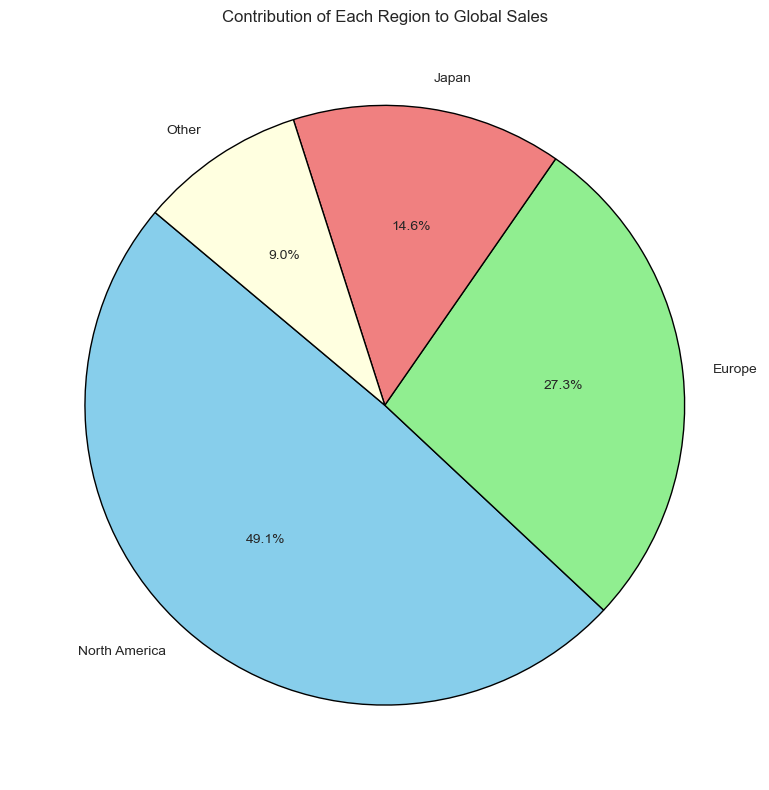

In [4]:
# Calculate total sales for each region
na_sales = df_cleaned['NA_Sales'].sum()
eu_sales = df_cleaned['EU_Sales'].sum()
jp_sales = df_cleaned['JP_Sales'].sum()
other_sales = df_cleaned['Other_Sales'].sum()
global_sales = df_cleaned['Global_Sales'].sum()

# Calculate the contribution of each region to global sales as a percentage
na_contribution = (na_sales / global_sales) * 100
eu_contribution = (eu_sales / global_sales) * 100
jp_contribution = (jp_sales / global_sales) * 100
other_contribution = (other_sales / global_sales) * 100

# Create a pie chart to visualize the contribution of each region to global sales
regions = ['North America', 'Europe', 'Japan', 'Other']
contributions = [na_contribution, eu_contribution, jp_contribution, other_contribution]

plt.figure(figsize=(8, 8))
plt.title('Contribution of Each Region to Global Sales')
plt.pie(contributions, labels=regions, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'lightcoral', 'lightyellow'], wedgeprops={'edgecolor': 'black'})

# Show the plot
plt.tight_layout()
plt.show()

##### Regions where certain genres or platforms are particularly popular

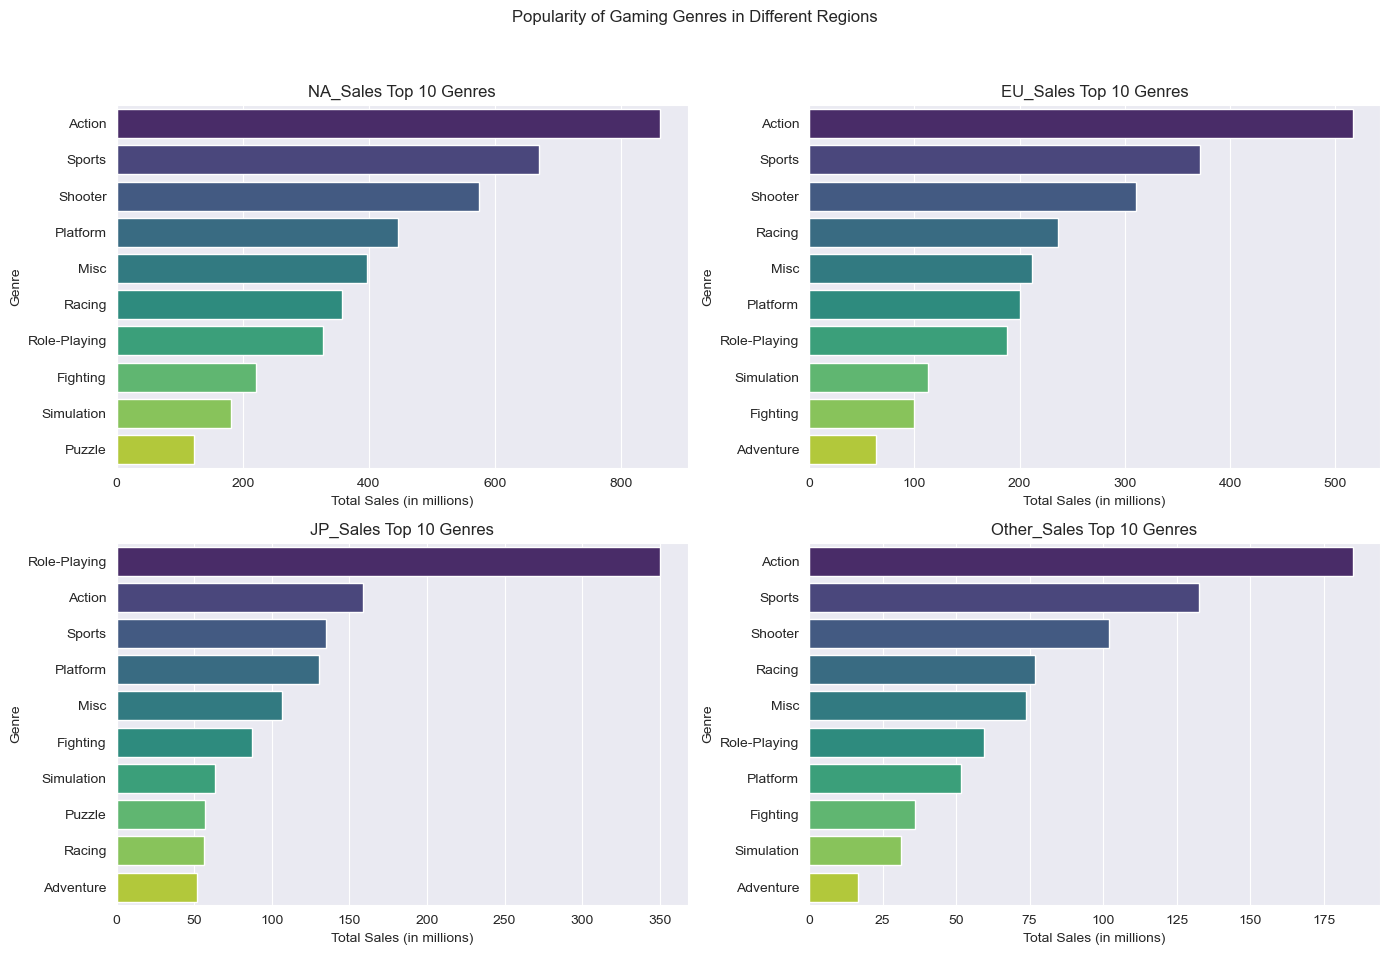

In [7]:
# Define the regions
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

# Create subplots for each region
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
fig.suptitle('Popularity of Gaming Genres in Different Regions')

for i, region in enumerate(regions):
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    # Group the data by genre and calculate total sales in the current region
    genre_sales_by_region = df_cleaned.groupby('Genre')[region].sum().sort_values(ascending=False).head(10)

    # Create a bar plot for the top 10 genres in the current region
    sns.barplot(x=genre_sales_by_region.values, y=genre_sales_by_region.index, ax=ax, palette='viridis')
    ax.set_xlabel('Total Sales (in millions)')
    ax.set_ylabel('Genre')
    ax.set_title(f'{region} Top 10 Genres')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

##### Regional sales trends changed over the years

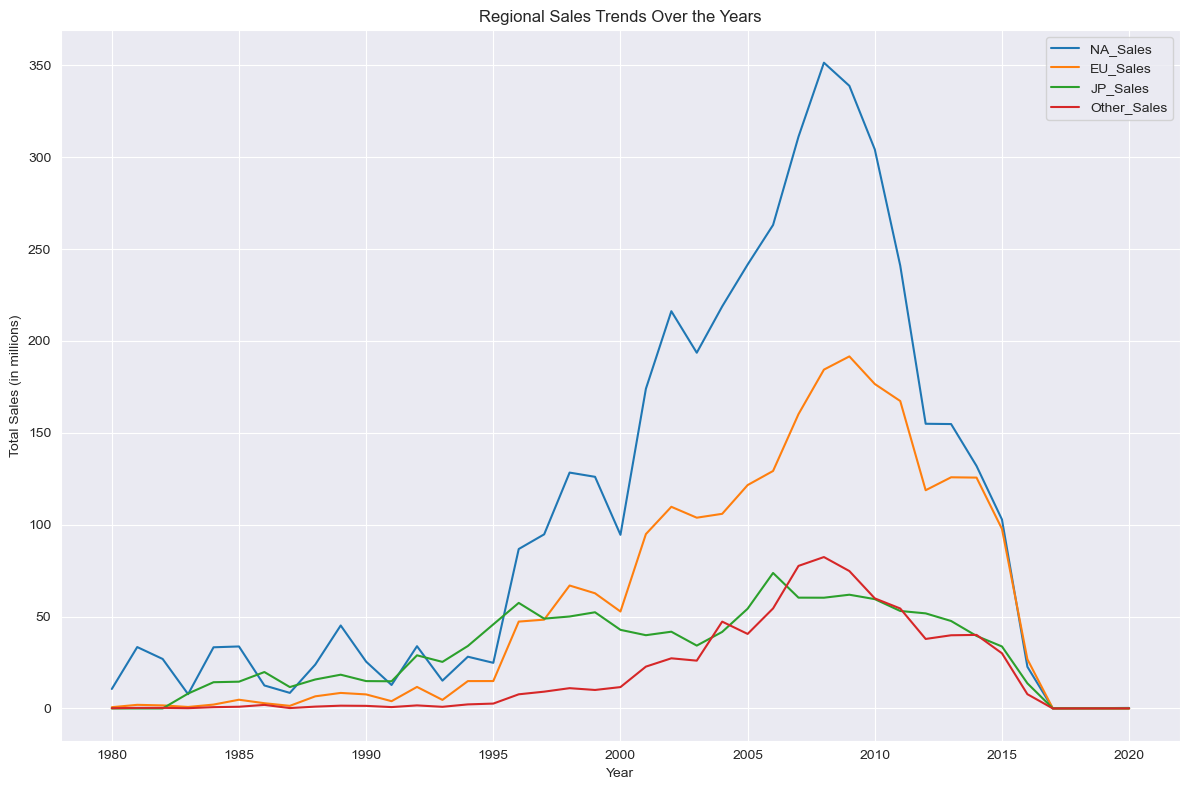

In [9]:
# Define the regions
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

# Create line plots for regional sales trends over the years
plt.figure(figsize=(12, 8))
plt.title('Regional Sales Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Sales (in millions)')

for region in regions:
    # Group the data by year and calculate total sales in the current region for each year
    regional_sales_by_year = df_cleaned.groupby('Year')[region].sum()

    # Create a line plot for the regional sales trend
    sns.lineplot(x=regional_sales_by_year.index, y=regional_sales_by_year.values, label=region)

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()